In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [51]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
# InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [52]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [53]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

###  Dataset Problems

#### An organization wants to predict who possible defaulters are for the consumer loans product.
#### They have data about historic customer behavior based on what they have observed. Hence when
#### they acquire new customers they want to predict who is riskier and who is not.

In [54]:
df = pd.read_excel('JUDY MUTHONI.xlsx')

In [55]:
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0


#### Find out the sum of null values

In [56]:
df.isna().sum()

OBS#              0
CHK_ACCT          0
DURATION          0
HISTORY           0
NEW_CAR           0
                 ..
JOB               0
NUM_DEPENDENTS    0
TELEPHONE         0
FOREIGN           0
RESPONSE          0
Length: 32, dtype: int64

#### Plotting null values

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

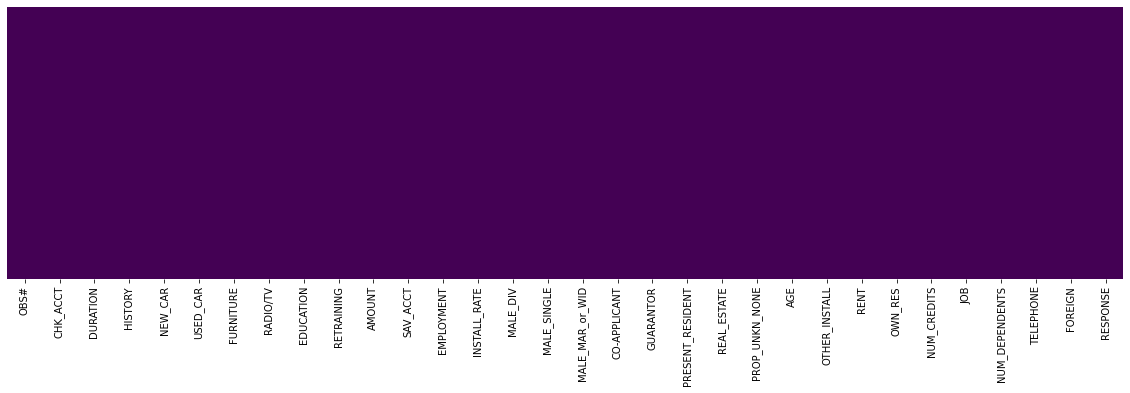

In [57]:
# plotting null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

#### Discrete and Continuous Variables

##### Let's have a look at Discrete and Continuous variables.

In [59]:
numeric = df.select_dtypes(["int", "float"]).columns

In [60]:
for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

OBS#: 1000 uniqueness variable
CHK_ACCT: 4 uniqueness variable
DURATION: 33 uniqueness variable
HISTORY: 5 uniqueness variable
NEW_CAR: 2 uniqueness variable
USED_CAR: 2 uniqueness variable
FURNITURE: 2 uniqueness variable
RADIO/TV: 2 uniqueness variable
EDUCATION: 2 uniqueness variable
RETRAINING: 2 uniqueness variable
AMOUNT: 921 uniqueness variable
SAV_ACCT: 5 uniqueness variable
EMPLOYMENT: 5 uniqueness variable
INSTALL_RATE: 4 uniqueness variable
MALE_DIV: 2 uniqueness variable
MALE_SINGLE: 2 uniqueness variable
MALE_MAR_or_WID: 2 uniqueness variable
CO-APPLICANT: 2 uniqueness variable
GUARANTOR: 2 uniqueness variable
PRESENT_RESIDENT: 4 uniqueness variable
REAL_ESTATE: 2 uniqueness variable
PROP_UNKN_NONE: 2 uniqueness variable
AGE: 53 uniqueness variable
OTHER_INSTALL: 2 uniqueness variable
RENT: 2 uniqueness variable
OWN_RES: 2 uniqueness variable
NUM_CREDITS: 4 uniqueness variable
JOB: 4 uniqueness variable
NUM_DEPENDENTS: 2 uniqueness variable
TELEPHONE: 2 uniqueness variable

#### How many missing data points do we have?¶

##### Let's see how many missing data we have in each column....

In [61]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:30]

OBS#              0
CHK_ACCT          0
DURATION          0
HISTORY           0
NEW_CAR           0
                 ..
OWN_RES           0
NUM_CREDITS       0
JOB               0
NUM_DEPENDENTS    0
TELEPHONE         0
Length: 30, dtype: int64

#### Great! there's no missing value! let's see the unique variables on the categorical data!

### Data Cleaning

#### Checking and cleaning

In [62]:
df.columns

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV',
       'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV',
       'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS',
       'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE'],
      dtype='object')

In [63]:
df.columns = df.columns.str.lower()
df.columns

Index(['obs#', 'chk_acct', 'duration', 'history', 'new_car', 'used_car', 'furniture', 'radio/tv',
       'education', 'retraining', 'amount', 'sav_acct', 'employment', 'install_rate', 'male_div',
       'male_single', 'male_mar_or_wid', 'co-applicant', 'guarantor', 'present_resident',
       'real_estate', 'prop_unkn_none', 'age', 'other_install', 'rent', 'own_res', 'num_credits',
       'job', 'num_dependents', 'telephone', 'foreign', 'response'],
      dtype='object')

### Random Under-Sampling

In [64]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [65]:
df.head()

,obs#,chk_acct,duration,history,new_car,used_car,furniture,radio/tv,education,retraining,amount,sav_acct,employment,install_rate,male_div,male_single,male_mar_or_wid,co-applicant,guarantor,present_resident,real_estate,prop_unkn_none,age,other_install,rent,own_res,num_credits,job,num_dependents,telephone,foreign,response
876,877,0,18,1,0,0,0,1,0,0,1940,0,1,3,0,1,0,1,0,4,0,1,36,1,0,0,1,3,1,1,0,1
383,384,2,12,2,1,0,0,0,0,0,1330,0,1,4,0,1,0,0,0,1,1,0,26,0,0,1,1,2,1,0,0,1
955,956,0,24,4,0,0,0,1,0,0,1231,3,4,4,0,0,0,0,0,4,0,0,57,0,1,0,2,3,1,1,0,1
478,479,1,12,2,0,0,0,0,0,1,1037,1,3,3,0,1,0,0,0,4,1,0,39,0,0,1,1,1,1,0,0,1
670,671,3,24,4,0,0,0,0,0,1,4139,1,2,3,0,1,0,0,0,3,0,0,27,0,0,1,2,1,1,1,0,1


In [66]:
# risk_data = df.loc[df["response"] == 1]
# not_risk_data = df.loc[df["response"] == 0][:500]

# normal_distributed_data = pd.concat([risk_data, not_risk_data])

response_1 = df.loc[df["response"] == 1]
response_0 = df.loc[df["response"] == 0]
sample_size = min(len(response_1), len(response_0))

response_1_sample = response_1.sample(n=sample_size, random_state=42)
response_0_sample = response_0.sample(n=sample_size, random_state=42)

normal_distributed_data = pd.concat([response_1_sample, response_0_sample])


In [67]:
# Shuffle dataframe rows
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,obs#,chk_acct,duration,history,new_car,used_car,furniture,radio/tv,education,retraining,amount,sav_acct,employment,install_rate,male_div,male_single,male_mar_or_wid,co-applicant,guarantor,present_resident,real_estate,prop_unkn_none,age,other_install,rent,own_res,num_credits,job,num_dependents,telephone,foreign,response
533,534,3,24,2,0,0,0,1,0,0,1311,1,3,4,0,0,1,0,0,3,0,0,26,0,0,1,1,2,1,1,0,1
813,814,0,48,2,0,0,0,0,0,0,3051,0,2,3,0,1,0,0,0,4,0,0,54,0,0,1,1,2,1,0,0,0
443,444,3,12,2,0,0,0,0,1,0,719,0,4,4,0,1,0,0,0,4,0,0,41,1,0,1,1,1,2,0,0,0
456,457,0,11,4,1,0,0,0,0,0,3905,0,2,2,0,1,0,0,0,2,1,0,36,0,1,0,2,2,2,0,0,1
845,846,1,21,2,0,0,1,0,0,0,3976,4,3,2,0,1,0,0,0,3,0,0,35,0,0,1,1,2,1,1,0,1


#### Equally Distributing and Correlating

Distribution of the response in the subsample dataset
response
1   0.500
0   0.500
Name: count, dtype: float64


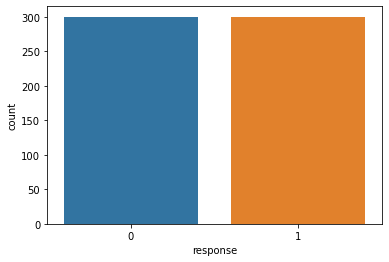

In [68]:
print("Distribution of the response in the subsample dataset")
print(loan["response"].value_counts() / len(loan))

# sns.countplot("response", data=loan)
# plt.title('Equally Distributed response', fontsize=14);

sns.countplot(x=loan["response"])
plt.show()

### Data Analysis

#### Descriptive Statistics

In [69]:
loan.describe()

,obs#,chk_acct,duration,history,new_car,used_car,furniture,radio/tv,education,retraining,amount,sav_acct,employment,install_rate,male_div,male_single,male_mar_or_wid,co-applicant,guarantor,present_resident,real_estate,prop_unkn_none,age,other_install,rent,own_res,num_credits,job,num_dependents,telephone,foreign,response
count,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000
mean,503.145,1.398,21.875,2.475,0.245,0.080,0.193,0.262,0.063,0.100,3417.493,1.000,2.290,3.023,0.058,0.537,0.088,0.057,0.052,2.843,0.262,0.170,34.863,0.195,0.190,0.695,1.410,1.927,1.148,0.392,0.032,0.500
std,286.679,1.254,12.497,1.101,0.430,0.272,0.395,0.440,0.244,0.300,3054.507,1.533,1.203,1.123,0.235,0.499,0.284,0.231,0.222,1.088,0.440,0.376,11.208,0.397,0.393,0.461,0.574,0.647,0.356,0.489,0.175,0.500
min,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,338.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
25%,249.750,0.000,12.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,1342.250,0.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,26.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,0.000,0.000
50%,513.500,1.000,18.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,2395.500,0.000,2.000,4.000,0.000,1.000,0.000,0.000,0.000,3.000,0.000,0.000,32.000,0.000,0.000,1.000,1.000,2.000,1.000,0.000,0.000,0.500
75%,748.250,3.000,27.000,4.000,0.000,0.000,0.000,1.000,0.000,0.000,4156.000,2.000,3.000,4.000,0.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,40.000,0.000,0.000,1.000,2.000,2.000,1.000,1.000,0.000,1.000
max,1000.000,3.000,72.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,18424.000,4.000,4.000,4.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,74.000,1.000,1.000,1.000,4.000,3.000,2.000,1.000,1.000,1.000


#### Univariate Analysis

#### Chebychev's Theorem
##### Chebyshev's Theorem estimates the minimum proportion of observations
##### that fall within a specified number of standard deviations from the mean.
##### This theorem applies to a broad range of probability distributions.
##### Chebyshev's Theorem is also known as Chebyshev's Inequality

#### About skewness:
##### As a general rule of thumb: If skewness is less than −1 or greater than 1 , the distribution is highly skewed.
##### If skewness is between −1 and −0.5 or between 0.5 and 1 , the distribution is moderately skewed.
##### If skewness is between −0.5 and 0.5 , the distribution is approximately symmetric.

#### About kurtosis:
##### For kurtosis, the general guideline is that if the number is greater than +1 , the distribution is too peaked.
##### Likewise, a kurtosis of less than −1 indicates a distribution that is too flat.
##### Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered non-normal.

### Numerical Column

OptionError: No such keys(s): 'mode.use_inf_as_null'

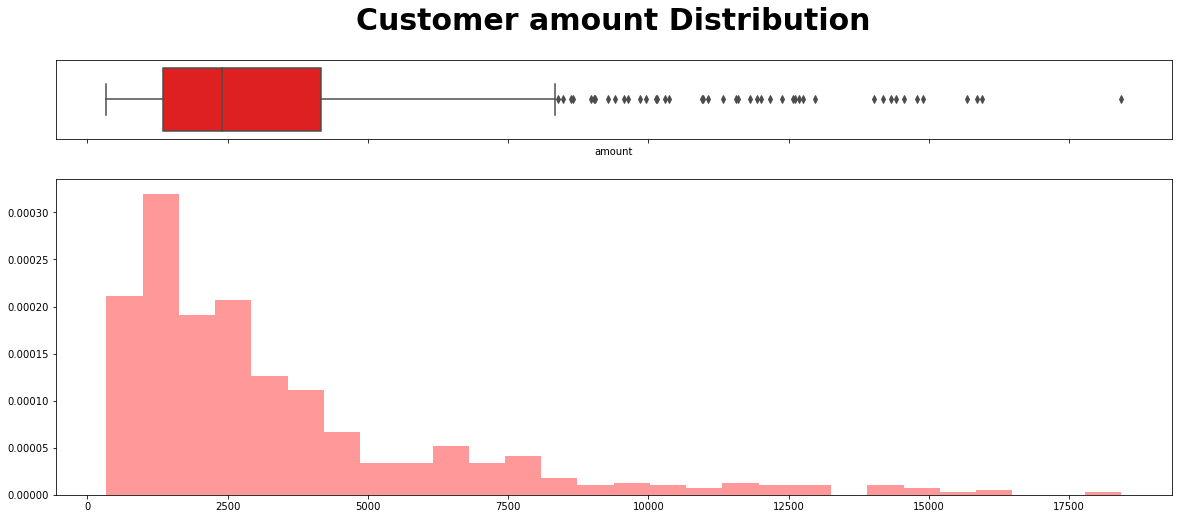

In [70]:
numerical_plotting(data=loan, col="amount", 
                   title="Customer amount Distribution", 
                   symb=" ", ylabel="Density", color="red");

#### Notes

In [ ]:
chebychev(loan.amount, title="amount", 
          interpret=f"at least 75% customer income is lies between 0 and 9634.5 US Dollars")

In [ ]:
skew_kurtosis(loan.amount, "Skew & Kurtosis Income")

In [ ]:
numerical_plotting(data=loan, col="employment", 
                   title="Customer employment Distribution", 
                   symb=" ", ylabel="Density", color="red");

In [ ]:
chebychev(loan.employment, title="employment", 
          interpret=f"at least 75% customer have 0 to 7 years professional experience of working")

In [ ]:
skew_kurtosis(loan.employment, "Skew & Kurtosis employment")

In [ ]:
numerical_plotting(data=loan, col="sav_acct", 
                   title="Customer sav_acct Distribution", 
                   symb=" ", ylabel="Density", color="red");

In [ ]:
chebychev(loan.  sav_acct, title="  sav_acct", 
          interpret=f"at least 75% customer have 0 to unkown savings on their accounts")

In [ ]:

skew_kurtosis(loan.sav_acct, "Skew & Kurtosis sav_acct")

In [ ]:
chebychev(loan.experience, title="Experience", 
          interpret=f"at least 75% customer have 0 to 22 years professional experience of working")

In [ ]:
numerical_plotting(data=loan, col="age", 
                   title="Customer Age Distribution", 
                   symb=" ", ylabel="Density", color="salmon");

In [ ]:
chebychev(loan.age, title="Age", 
          interpret=f"at least 75% customer age is lies between 0 and 59")

In [ ]:
skew_kurtosis(loan.age, "Skew & Kurtosis Age")

OptionError: No such keys(s): 'mode.use_inf_as_null'

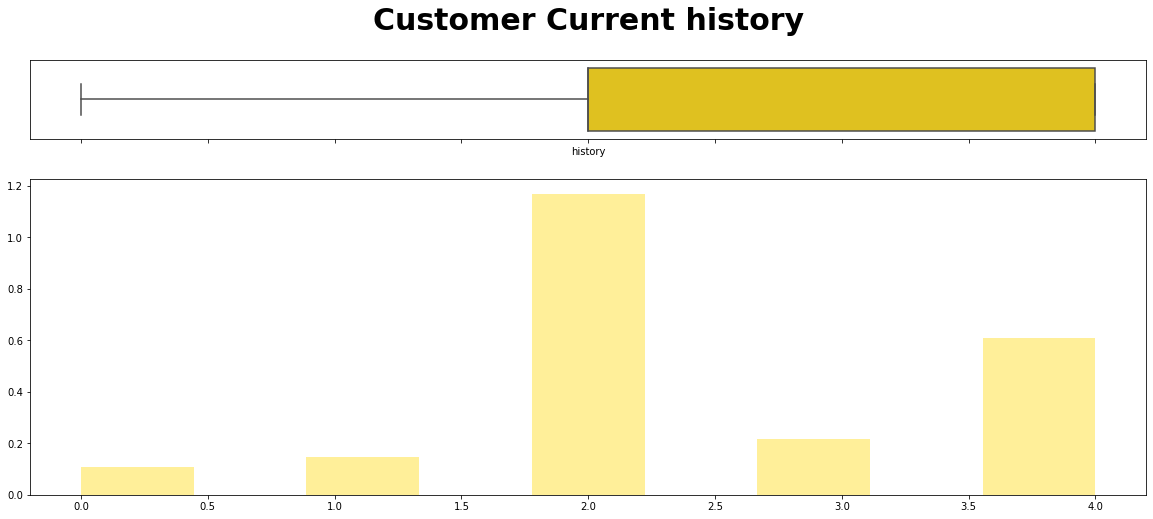

In [71]:
numerical_plotting(data=loan, col="history", 
                   title="Customer Current history", 
                   symb=" ", ylabel="Density", color="gold");

In [ ]:
chebychev(loan.history, title="history", 
          interpret=f"at least 75% customer have a good history of paying back in full")

In [ ]:
skew_kurtosis(loan.history, "Skew & Kurtosis History")

OptionError: No such keys(s): 'mode.use_inf_as_null'

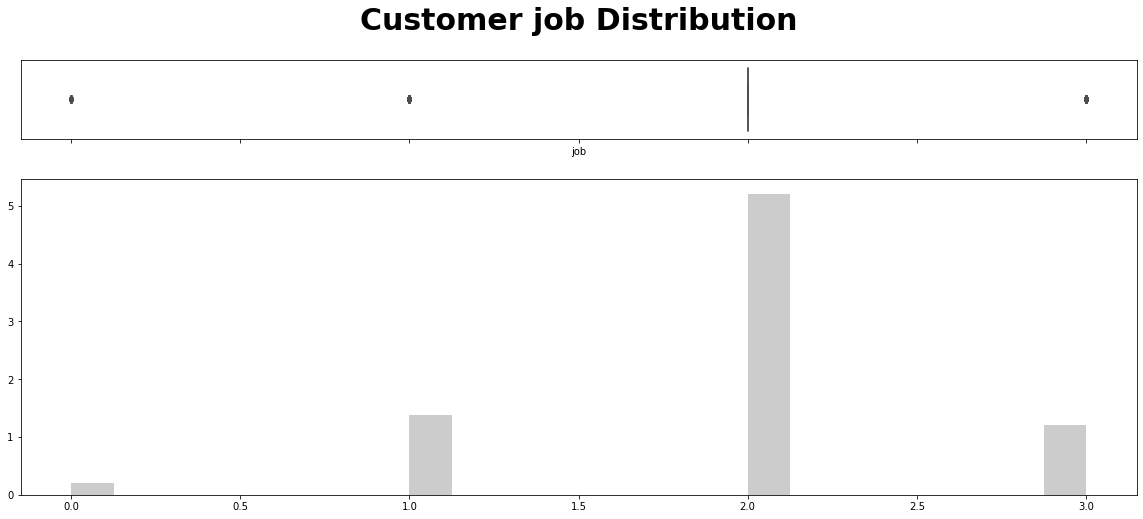

In [72]:
numerical_plotting(data=loan, col="job", 
                   title="Customer job Distribution", 
                   symb=" ", ylabel="Density", color="gray");

In [ ]:
chebychev(loan.job, title="Job", 
          interpret=f"at least 75% customer are skilled labour")

In [ ]:
skew_kurtosis(loan.job, "Skew & Kurtosis Job")

### Categorical Column

In [ ]:
loan_rents = loan["rent"].value_counts()

count_pie_plot(datapie=loan_rents,
               datacount=loan,
               colcount="rent",
               colpiey=loan_rents.values,
               text1="Rents or Or Not",
               pielabels=["Rents", "Does Not Rents"],
               text2="Are you Renting or Not?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Is customer renting",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Renting", "Not Renting"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

In [ ]:
loan_estate = loan["real_estate"].value_counts()

count_pie_plot(datapie=loan_estate,
               datacount=loan,
               colcount="rent",
               colpiey=loan_estate.values,
               text1="Does Not Own or Owns",
               pielabels=["Does Not Own", "Owns Real Estate"],
               text2="Do you own real estate or not?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Is customer renting",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Does Not Own Real Estate", "Owns"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

In [73]:
loan["response"].value_counts()

response
1    300
0    300
Name: count, dtype: int64

### Bivariate Analysis

#### What is Correlation?
##### Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

In [74]:
pearson_correlation(loan["age"], loan["response"], "Age & Response Correlation")

--------------- Age & Response Correlation ---------------

Pearson correlation coefficient: 0.080

Samples are correlated (reject H0) p=0.049



In [75]:
pearson_correlation(loan["employment"], loan["response"], "Employment & Response Correlation")

--------------- Employment & Response Correlation ---------------

Pearson correlation coefficient: 0.100

Samples are correlated (reject H0) p=0.014



In [76]:
pearson_correlation(loan["num_dependents"], loan["response"], "num_dependents & Response Correlation")

--------------- num_dependents & Response Correlation ---------------

Pearson correlation coefficient: -0.014

Samples are uncorrelated (fail to reject H0) p=0.731



In [77]:
pearson_correlation(loan["present_resident"], loan["response"], "present_resident & Response Correlation")

--------------- present_resident & Response Correlation ---------------

Pearson correlation coefficient: -0.006

Samples are uncorrelated (fail to reject H0) p=0.881



In [78]:
pearson_correlation(loan["foreign"], loan["response"], "foreign & Response Correlation")

--------------- foreign & Response Correlation ---------------

Pearson correlation coefficient: 0.105

Samples are correlated (reject H0) p=0.010



In [79]:
pearson_correlation(loan["new_car"], loan["response"], "new_car & Response Correlation")

--------------- new_car & Response Correlation ---------------

Pearson correlation coefficient: -0.120

Samples are correlated (reject H0) p=0.003



### Multivariate Analysis

In [80]:
# C = (loan.loc[loan["job"]
#          .isin(["1", "2", "3", "4","5"])]
#          .loc[:, ["employment", "age", "response"]])

# data = C
# title = "Top 5 City & Risk Flag"
# x = "employment"
# y = "age"
# hue = "response"
# xlabel = "Top 5 City Income"
# ylabel = "Income"

# mtvboxplot(data=data, title=title, x=x, y=y, 
#            hue=hue, xlabel=xlabel, ylabel=ylabel);

### Numerical Column

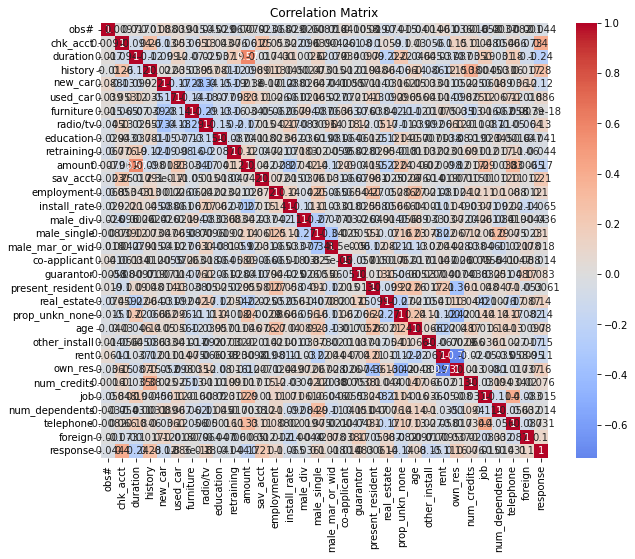

In [81]:
correlation_matrix = loan.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing

#### Getting Mutual Info

In [82]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = loan.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    loan[col] = encoder.fit_transform(loan[col].values.tolist())

In [83]:
# getting the Mutual Information about the data
X_mutual = loan.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("response")

del X_mutual["obs#"]

# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame()

,MI Scores
index,0.693
amount,0.664
chk_acct,0.085
duration,0.064
age,0.045
...,...
telephone,0.000
male_mar_or_wid,0.000
co-applicant,0.000
num_dependents,0.000


In [84]:
X_mutual.head()

,index,chk_acct,duration,history,new_car,used_car,furniture,radio/tv,education,retraining,amount,sav_acct,employment,install_rate,male_div,male_single,male_mar_or_wid,co-applicant,guarantor,present_resident,real_estate,prop_unkn_none,age,other_install,rent,own_res,num_credits,job,num_dependents,telephone,foreign
0,533,3,24,2,0,0,0,1,0,0,1311,1,3,4,0,0,1,0,0,3,0,0,26,0,0,1,1,2,1,1,0
1,813,0,48,2,0,0,0,0,0,0,3051,0,2,3,0,1,0,0,0,4,0,0,54,0,0,1,1,2,1,0,0
2,443,3,12,2,0,0,0,0,1,0,719,0,4,4,0,1,0,0,0,4,0,0,41,1,0,1,1,1,2,0,0
3,456,0,11,4,1,0,0,0,0,0,3905,0,2,2,0,1,0,0,0,2,1,0,36,0,1,0,2,2,2,0,0
4,845,1,21,2,0,0,1,0,0,0,3976,4,3,2,0,1,0,0,0,3,0,0,35,0,0,1,1,2,1,1,0


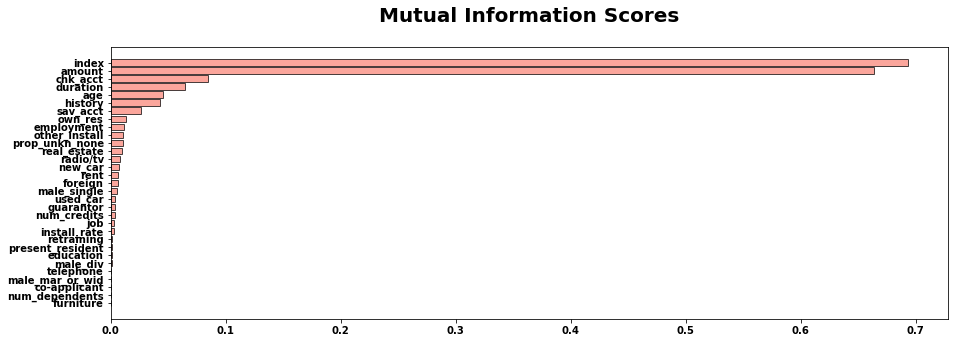

In [85]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

### Feature Selection

In [86]:
loan.columns

Index(['obs#', 'chk_acct', 'duration', 'history', 'new_car', 'used_car', 'furniture', 'radio/tv',
       'education', 'retraining', 'amount', 'sav_acct', 'employment', 'install_rate', 'male_div',
       'male_single', 'male_mar_or_wid', 'co-applicant', 'guarantor', 'present_resident',
       'real_estate', 'prop_unkn_none', 'age', 'other_install', 'rent', 'own_res', 'num_credits',
       'job', 'num_dependents', 'telephone', 'foreign', 'response'],
      dtype='object')

In [87]:
# For now, let's just use income - current_job_yrs column
# I'll update and maybe use feature engineering in the future
features = ["amount", "chk_acct", "duration", "age","education",
            "history", "sav_acct", "employment","own_res","install_rate",
            "rent","used_car","prop_unkn_none","radio/tv","install_rate"]

X_features = loan[features]
y_labels = loan["response"]

X_features.shape, y_labels.shape

((600, 15), (600,))

In [88]:
X_features.head()

,amount,chk_acct,duration,age,education,history,sav_acct,employment,own_res,install_rate,rent,used_car,prop_unkn_none,radio/tv,install_rate
533,1311,3,24,26,0,2,1,3,1,4,0,0,0,1,4
813,3051,0,48,54,0,2,0,2,1,3,0,0,0,0,3
443,719,3,12,41,1,2,0,4,1,4,0,0,0,0,4
456,3905,0,11,36,0,4,0,2,0,2,1,0,0,0,2
845,3976,1,21,35,0,2,4,3,1,2,0,0,0,0,2


In [89]:
y_labels.value_counts()

response
1    300
0    300
Name: count, dtype: int64

### Split Dataset

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, random_state=42, 
    test_size=.25, stratify=y_labels
)

print(f"X_train shape: {X_train.shape} \n"
       f"X_test shape: {X_test.shape} \n"
       f"y_train shape: {y_train.shape} \n"
       f"y_test.shape: {y_test.shape}")

X_train shape: (450, 15) 
X_test shape: (150, 15) 
y_train shape: (450,) 
y_test.shape: (150,)


#### Modeling, Scoring and Evaluation

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameter
parameter = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)], 
    "min_samples_split" : [2, 5, 10], 
    "min_samples_leaf"  : [1, 2, 4], 
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"]
}

# models
model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_distributions=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(f"model train score: {model.score(X_train, y_train)},\n" 
      f"model test score: {model.score(X_test, y_test)},\n" 
      f"model best score: {model.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
model train score: 1.0,
model test score: 0.6,
model best score: 0.6377777777777778


/home/nicholas/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/nicholas/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/nicholas/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/nicholas/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='s

In [92]:
model.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 24,
 'criterion': 'log_loss'}

In [93]:
best_model = model.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=24, max_features='auto',
                       random_state=42)

In [94]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59        73
           1       0.61      0.60      0.61        77

    accuracy                           0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.60      0.60      0.60       150



##### Improving model performance is an iterative process, Am not contented with the accuracy of my model, there are ways to continue improving our model performance including 

#### Feature Engineering

#### Hyperparameter Tuning

#### Ensemble Methods
#### Cross-Validation
#### Handling Imbalanced Classes

#### Feature Importance Analysis
#### Regularization
##### Data Augmentation

##### Handling Missing Values

##### Evaluate Other Models


### I will continue improving the model performance, when we meet i present my fine tuned model.